# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [258]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [259]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

print(df.shape)
df.head()

(130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1) Is the distribution of body temperatures normal?
We'll start by taking a look at the histogram of the data to see if it appears normally distributed.

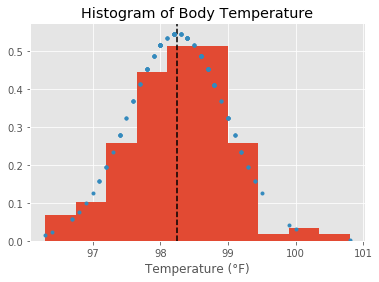

In [260]:
temp = df.temperature
mean = np.mean(temp)
std = np.std(temp)

# plot histogram of the data
plt.hist(temp, density = True)
plt.title("Histogram of Body Temperature")
plt.xlabel("Temperature (°F)")

# add a dashed line at the mean
plt.axvline(mean, color = "black", linestyle = "dashed")

# add normal curve
pdf = stats.norm.pdf(temp, mean, std)
plt.plot(temp, pdf, ".")
plt.show()

The data appear symmetrical accross the mean, and there does not appear to be any outliers. We might conclude it is reasonable to assume normality, but just to be sure we will check the ECDF.

In [261]:
# create a function to give us the ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

In [262]:
# calculate mean, std dev of data
mean = np.mean(temp)
std = np.std(temp)

# set seed
np.random.seed(12345)

# simulate random normal distribution
samples = np.random.normal(mean, std, 10000)

# compute ecdf of data, and normally distributed theoretical samples
x_sample, y_sample = ecdf(samples)
x, y = ecdf(temp)

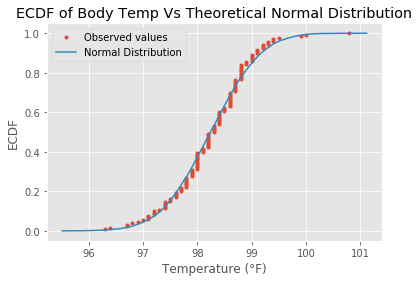

In [263]:
# plot ecdf of body temp against theoretical normal dist
plt.plot(x, y, marker = ".", linestyle = "none", label = "Observed values")
plt.plot(x_sample, y_sample, label = "Normal Distribution")
plt.ylabel("ECDF")
plt.xlabel("Temperature (°F)")
plt.title("ECDF of Body Temp Vs Theoretical Normal Distribution")
plt.legend(loc = "upper left")
plt.show()

Based on our two above approaches, it does indeed appear that the data are approximately normally distributed.
## 2) Is the sample size large? Are the observations independent?

In [264]:
print(df.shape)

(130, 3)


We don't know if the data were sampled with replacement, however since there are 130 observations (and 130 is less than 10% of the population) we can assume we can treat individual observations as if they were independent. This is because removing each observation doesn't change the population very much as we sample. Also, the sample size is greater than 30, which is the general rule for assuming normality. Thus the sample is large enough, but not too large either.
## 3) Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
* Now try using the other test. How is the result different? Why?

**Null Hypothesis:** Mean human body temperature is equal to 98.6 °F

**Alternative Hypothesis:** Mean human body temperature is *not* equal to 98.6 °F

We'll set our significance level (alpha) to be 0.05

In [265]:
# define the function to get bootstrap samples
def draw_bs_reps(data, func, size):
    # Initialize empty array of replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

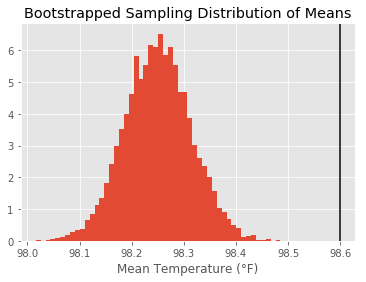

In [266]:
# get the bootstrap replicates
np.random.seed(12345)
bs_reps = draw_bs_reps(data = temp, func = np.mean, size = 10000)

# plot a histogram of the bootstrap replicates
plt.hist(bs_reps, bins = 50, density = True)
plt.xlabel("Mean Temperature (°F)")
plt.title("Bootstrapped Sampling Distribution of Means")
plt.axvline(98.6, color = "black")
plt.show()

In [267]:
bs_p_value = sum(bs_reps >= 98.6) / len(bs_reps) * 2
print("P-value for the bootstrap hypothesis test: " + str(bs_p_value))

P-value for the bootstrap hypothesis test: 0.0


The bootstrap hypothesis test suggests that we may reject the null hypothesis in favor of the alternative hypothesis. That is to say, the true population mean of body temperature is *not* equal to 98.6 °F.


We will use a one-sample t-test next. We use one sample since we are given a sample of body temperatures and wish to compare it to the historical population mean. We use the t-test instead of the z-test since we do not know the population standard deviation, which is required in the computations.

In [268]:
# initialize values for calculating t-statistic
x_bar = np.mean(temp)
S_x = np.std(temp)
n = len(temp)
mu0 = 98.6

# calculate the t-statistic
t_stat = (x_bar - mu0) / (S_x / np.sqrt(n - 1))

# calculate the p-value
p_value = stats.t.sf(np.abs(t_stat), n - 1) * 2

print("P-value for the one sample t-test is: %.10f" % p_value)

P-value for the one sample t-test is: 0.0000002411


Since our p-value is once again lower than alpha = 0.05, we can reject the null hypothesis in favor of the alternative hypothesis: the true mean body temperature is *not* equal to 98.6 °F.

Next we try using a z-test.

In [269]:
# calculate estimate of std error
SE = std / np.sqrt(n - 1)

# calculate the z-stat
z_stat = (mean - mu0) / SE

# calculate the p-value
p_value_z = stats.norm.cdf(z_stat) * 2
print("P-value for the z-test is: %.10f" % p_value_z)

P-value for the z-test is: 0.0000000490


The p-value is less than alpha, once again we reject the null hypothesis. 
## 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [270]:
# set seed
np.random.seed(123)

# draw sample of ten
sample = np.random.choice(temp, size = 10)

# t-test
z, p = stats.ttest_1samp(sample, mu0)

# z-test
# calculate the z-stat/p-value
z_stat = (np.mean(sample) - mu0) / (np.std(sample) / np.sqrt(len(sample) - 1))

p_z = stats.norm.cdf(z_stat) * 2

print("P-value for the t-test is: %.10f" % p)
print("P-value for the z-test is: %.10f" % p_z)

P-value for the t-test is: 0.1267573603
P-value for the z-test is: 0.0924645227


We should use the t-test since we have a small sample sie (n = 10 < 30) and we do not know the true population standard deviation, which is required to estimate the standard error. The z-test shows a lower p-value, and may lead to more type I errors where we erroneously reject the null hypothesis.
## 5) At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [271]:
# bootstrap confidence interval
bs_ci = np.percentile(bs_reps, [2.5, 97.5])

# t-stat confidence interval
critical_val = stats.t.ppf(0.975, n - 1)
margin = critical_val * SE

t_ci = [mean - margin, mean + margin]

print("95% Bootstrap Confidence Interval: ", bs_ci)
print("95% t-test Confidence Interval: ", t_ci)

95% Bootstrap Confidence Interval:  [98.12615385 98.37694231]
95% t-test Confidence Interval:  [98.12200290560804, 98.37645863285351]


If we use the confidence intervals we calculated above, this would suggest an abnormal temperature would be less than 98.1 °F or greater than 98.4 °F. However, this does not seem to make much sense when we consider how many healthy people may have body temperatures outside that range. Instead what we want is to calculate a prediction interval.

In [272]:
pi = stats.norm.interval(0.95, loc = mean, scale = std)
print('95% prediction interval: ', pi)

95% prediction interval:  (96.81775582674824, 99.68070571171332)


This indicates that an abnormal body temperature would be less than 96.8 °F or greater than 99.7 °F.

## 6) Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

We will answer this question by comparing the sample means for the two groups, and conducting a t-test. We don't know the standard deviation for the population, so we want to use the t-test, but we also don't know for sure if the variances across the two groups are equal. For this reason we must use Welch's T-test.

**Null Hypothesis:** The difference in mean body temperature between male and female groups is equal to 0

**Alternative Hypothesis:**  The difference in mean body temperature between male and female groups is *not* equal to 0

We'll set our significance level (alpha) to be 0.05

In [273]:
mtemp = df.temperature[df.gender == "M"]
ftemp = df.temperature[df.gender == "F"]

mean_m = np.mean(mtemp)
mean_f = np.mean(ftemp)

import scipy

# calculate p-value
stat, pvalue = scipy.stats.ttest_ind(mtemp, ftemp, equal_var = False)

print("Mean male body temp: %.2f °F" % mean_m)
print("Mean female body temp: %.2f °F" % mean_f)
print("Difference in male & female mean body temp: %.4f °F" % (mean_f - mean_m))
print("P-value for Welch's T-test: %.10f" % pvalue)

Mean male body temp: 98.10 °F
Mean female body temp: 98.39 °F
Difference in male & female mean body temp: 0.2892 °F
P-value for Welch's T-test: 0.0239382642


**Conclusion:** We determined that the true population mean of body temperature is around 98.25 °F, and we are 95% confident it lies between 98.1 and 98.4 °F. We also discovered that there is likely a difference in mean body tempeture across genders. Since our p-value is less than alpha = 0.05, we reject the null hypothesis: there is a statistically significant difference between male and female mean body temperature.